<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/day1_10DaysMLChallenge_bySid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/time_series_2019-ncov-Confirmed.csv")

In [88]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [0]:
data=df.drop(columns=['Province/State'])

In [90]:
data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [0]:
colnames=list(data.columns)

In [0]:
rows=data.shape[0]

In [0]:
modifiedColNames=colnames[3:]
l=[]
for name in modifiedColNames:
  r=np.count_nonzero(data[name])
  remain=rows-r
  percent=(remain/rows)*100

  if percent>70:
    data=data.drop(columns=name)

In [94]:
data.head()

,Country/Region,Lat,Long,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,15.0000,101.0000,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,36.0000,138.0000,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,1.2833,103.8333,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,28.1667,84.2500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,2.5000,112.5000,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [0]:
data1=data['Lat']
data2=data['Long']
df1=data.drop(columns=['Lat','Long'])
df2 = df1.groupby(['Country/Region'],as_index=False).sum()

In [96]:
df2.shape
df2.tail()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
166,Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43,43
167,Venezuela,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70
168,Vietnam,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113
169,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3
170,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3


In [0]:
dcols=list(df2.columns)

In [0]:
o=[]
for column in dcols:
  t=df2[column].sum()
  o.append(t)

In [0]:
rowsum=df2.sum(axis=1)

In [100]:
df2['Total ']=rowsum
df2.head()


,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,240
1,Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,624
2,Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,977
3,Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,421
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,5


In [101]:
a1=df2['Country/Region']
a2=df2['Total ']
a1
cn=["Country","Total Covid-19 cases"]
dfp1 = pd.DataFrame(columns = cn)
dfp1['Country']=a1
dfp1['Total Covid-19 cases']=a2
dfp1.head()

,Country,Total Covid-19 cases
0,Afghanistan,240
1,Albania,624
2,Algeria,977
3,Andorra,421
4,Angola,5


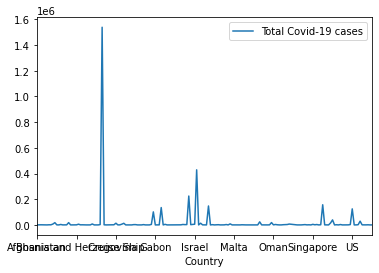

In [102]:
dfp1.plot(x='Country',y='Total Covid-19 cases',kind = 'line')
plt.show()

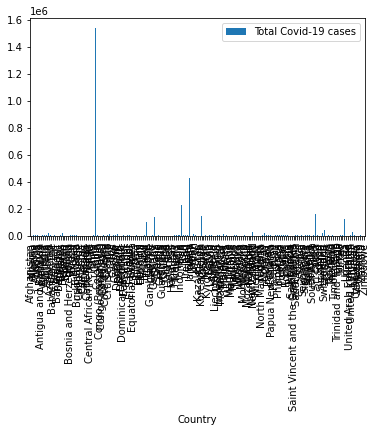

In [103]:
dfp1.plot(x='Country',y='Total Covid-19 cases',kind = 'bar')

In [104]:
top5=dfp1.nlargest(10,'Total Covid-19 cases')
top5

,Country,Total Covid-19 cases
33,China,1538032
81,Italy,428621
77,Iran,224700
145,Spain,156912
87,"Korea, South",147381
63,Germany,135037
160,US,124813
59,France,101444
150,Switzerland,39007
164,United Kingdom,29253


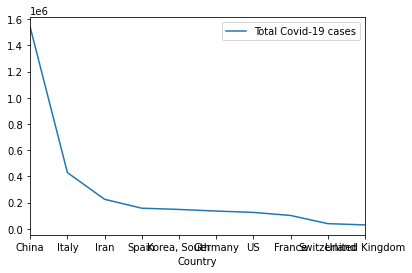

In [105]:
top5.plot(x='Country',y='Total Covid-19 cases',kind='line')

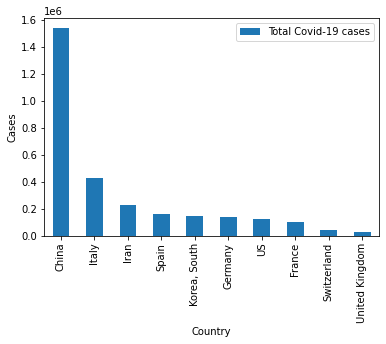

In [106]:
top5.plot(x='Country',y='Total Covid-19 cases',kind='bar')
plt.ylabel('Cases')
plt.show()

In [0]:
df3=df2.loc[df2['Country/Region'] == 'Italy']

In [108]:
df3

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
81,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,428621


In [109]:
df4=df3.drop(columns=['Country/Region','Total '])
df4

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
81,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138


In [0]:
dates=list(df4.columns)

In [111]:
cases=[]
for date in dates:
  x=df4.get_value(81,date)
  cases.append(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
cases

[3089,
 3858,
 4636,
 5883,
 7375,
 9172,
 10149,
 12462,
 12462,
 17660,
 21157,
 24747,
 27980,
 31506,
 35713,
 41035,
 47021,
 53578,
 59138]

In [0]:
task2=pd.DataFrame(columns=['dates','cases'])

In [0]:
task2['dates']=dates

In [0]:
task2['cases']=cases

In [116]:
task2

,dates,cases
0,3/4/20,3089
1,3/5/20,3858
2,3/6/20,4636
3,3/7/20,5883
4,3/8/20,7375
5,3/9/20,9172
6,3/10/20,10149
7,3/11/20,12462
8,3/12/20,12462
9,3/13/20,17660


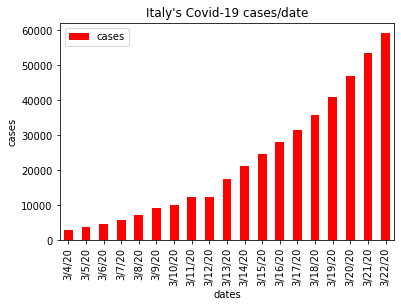

In [117]:
task2.plot(x='dates',y='cases',kind='bar',color='red')
plt.ylabel('cases')
plt.title('Italy\'s Covid-19 cases/date')
plt.show()

In [0]:
continents=pd.read_csv('/content/gdrive/My Drive/Countries-Continents.csv')

In [122]:
continents.head()
c1=continents['Continent']
c2=continents['Country']
cont=pd.DataFrame(columns=['Country/Region','Continent'])
cont['Continent']=c1
cont['Country/Region']=c2
cont.head()

,Country/Region,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina,Africa


In [121]:
df2.head()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,240
1,Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,624
2,Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,977
3,Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,421
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,5


In [0]:
merged = df2.merge(cont, on='Country/Region')

In [124]:
merged.head()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total,Continent
0,Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,240,Asia
1,Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,624,Europe
2,Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,977,Africa
3,Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,421,Europe
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,5,Africa


In [127]:
merged.tail()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total,Continent
149,Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43,43,174,Asia
150,Venezuela,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70,322,South America
151,Vietnam,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113,975,Asia
152,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,11,Africa
153,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,7,Africa


In [0]:
merged1 = merged.groupby(['Continent'],as_index=False).sum()

In [131]:
merged1.head()

,Continent,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Africa,21,24,43,43,83,91,103,114,130,172,248,305,380,458,568,720,896,1064,1299,6762
1,Asia,89744,91015,93054,94789,96001,96869,98060,99825,101117,102949,104840,106752,108310,110354,112356,114767,117003,119655,122657,1980117
2,Europe,4336,5736,7493,9637,12174,14960,18351,23373,24101,38165,46321,54661,65376,76437,89991,108143,128470,149774,168121,1045620
3,North America,188,260,320,465,599,681,1060,1426,1837,2454,3044,3897,5231,7154,8738,14874,20595,27543,35742,136108
4,Oceania,55,58,64,68,81,96,112,133,133,205,256,305,385,464,588,710,832,1125,1383,7053


In [0]:
top5continents=merged1.nlargest(5,'Total ')


In [134]:
top5continents

,Continent,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
1,Asia,89744,91015,93054,94789,96001,96869,98060,99825,101117,102949,104840,106752,108310,110354,112356,114767,117003,119655,122657,1980117
2,Europe,4336,5736,7493,9637,12174,14960,18351,23373,24101,38165,46321,54661,65376,76437,89991,108143,128470,149774,168121,1045620
3,North America,188,260,320,465,599,681,1060,1426,1837,2454,3044,3897,5231,7154,8738,14874,20595,27543,35742,136108
5,South America,16,22,34,40,62,69,91,124,143,293,358,421,637,920,1155,1643,2259,2964,4096,15347
4,Oceania,55,58,64,68,81,96,112,133,133,205,256,305,385,464,588,710,832,1125,1383,7053


In [135]:
h1=top5continents['Continent']
h2=top5continents['Total ']
task3=pd.DataFrame(columns=['Continent','Cases'])
task3['Continent']=h1
task3['Cases']=h2
task3

,Continent,Cases
1,Asia,1980117
2,Europe,1045620
3,North America,136108
5,South America,15347
4,Oceania,7053


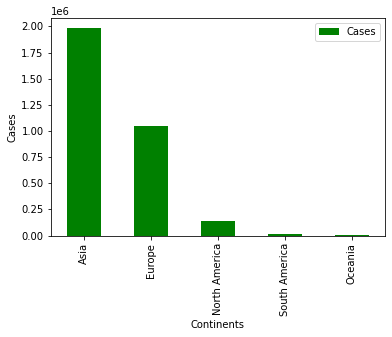

In [136]:
task3.plot(x='Continent',y='Cases',kind='bar',color='green')
plt.xlabel('Continents')
plt.ylabel('Cases')
plt.show()